In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits, load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
X = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

print(X, X.shape)
print(y, y.shape)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]] (10, 1)
[0 0 0 0 1 1 1 1 1 1] (10,)


In [3]:
model = LogisticRegression(solver="liblinear", random_state=11)
model

LogisticRegression(random_state=11, solver='liblinear')

In [4]:
model.fit(X, y)

LogisticRegression(random_state=11, solver='liblinear')

In [5]:
print("list of classes:", model.classes_)
print("weights:", model.coef_)
print("bias:", model.intercept_)

list of classes: [0 1]
weights: [[0.51491375]]
bias: [-1.04608067]


In [6]:
prediction = model.predict(X)
print("Target class:", y)
print("Prediction  :", prediction)

Target class: [0 0 0 0 1 1 1 1 1 1]
Prediction  : [0 0 0 1 1 1 1 1 1 1]


In [7]:
model.predict_proba(X)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [8]:
print("accuracy:", model.score(X, y))

accuracy: 0.9


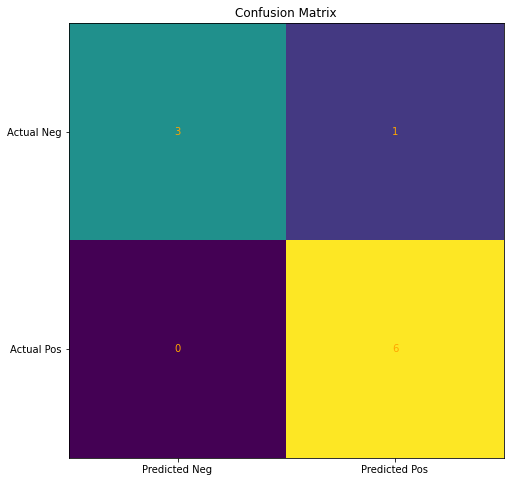

In [9]:
cm = confusion_matrix(y, prediction)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.yaxis.set(ticks=(0, 1), ticklabels=("Actual Neg", "Actual Pos"))
ax.xaxis.set(ticks=(0, 1), ticklabels=("Predicted Neg", "Predicted Pos"))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="orange")
plt.title("Confusion Matrix")
plt.show()

In [10]:
print(classification_report(y, prediction, target_names=["Negative", "Positive"]))

              precision    recall  f1-score   support

    Negative       1.00      0.75      0.86         4
    Positive       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



list of classes: [0 1]
weights: [[1.0180379]]
bias: [-3.11627922]
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00         4
    Positive       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



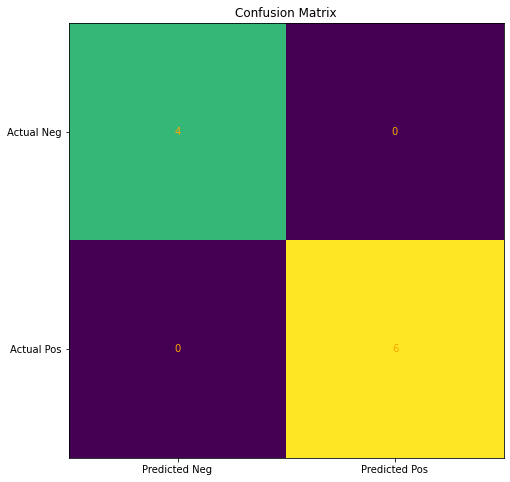

In [11]:
improved_model = LogisticRegression(solver="liblinear", random_state=11, C=7.5)
improved_model.fit(X, y)

print("list of classes:", improved_model.classes_)
print("weights:", improved_model.coef_)
print("bias:", improved_model.intercept_)

improved_prediction = improved_model.predict(X)
print(classification_report(y, improved_prediction, target_names=["Negative", "Positive"]))

cm = confusion_matrix(y, improved_prediction)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.yaxis.set(ticks=(0, 1), ticklabels=("Actual Neg", "Actual Pos"))
ax.xaxis.set(ticks=(0, 1), ticklabels=("Predicted Neg", "Predicted Pos"))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="orange")
plt.title("Confusion Matrix")
plt.show()

In [12]:
X, y = load_digits(return_X_y=True)

print("Dataset shape:", X.shape)
print("Target shape:", y.shape)

Dataset shape: (1797, 64)
Target shape: (1797,)


In [13]:
print(X[:5])

[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
  12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0.  0.

In [14]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

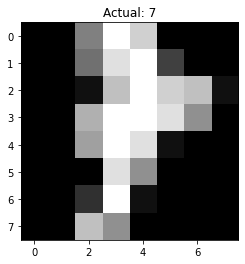

In [15]:
idx = np.random.randint(len(X))
img = X[idx].reshape(8, 8)
plt.imshow(img, cmap="gray")
plt.title("Actual: {}".format(y[idx]))
plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=11)

print("training set size:", X_train.shape)
print("test set size:", X_test.shape)

training set size: (1437, 64)
test set size: (360, 64)


In [17]:
model = LogisticRegression(solver="liblinear", random_state=11, multi_class="ovr")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("training set performance:")
print(classification_report(y_train, model.predict(X_train)))

print("test set performance:")
print(classification_report(y_test, y_pred))

training set performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       0.98      1.00      0.99       145
           2       1.00      1.00      1.00       138
           3       1.00      1.00      1.00       142
           4       1.00      1.00      1.00       140
           5       1.00      1.00      1.00       155
           6       1.00      1.00      1.00       151
           7       1.00      1.00      1.00       143
           8       0.99      0.98      0.99       140
           9       1.00      0.99      1.00       143

    accuracy                           1.00      1437
   macro avg       1.00      1.00      1.00      1437
weighted avg       1.00      1.00      1.00      1437

test set performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.95      0.95      0.95        37
           2       1.00      1

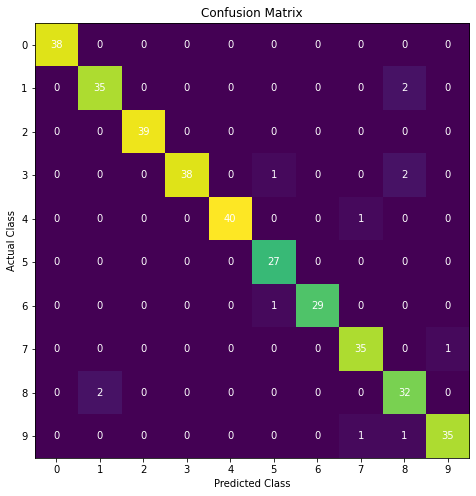

In [18]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_ylabel("Actual Class")
ax.set_xlabel("Predicted Class")
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="white")
plt.title("Confusion Matrix")
plt.show()

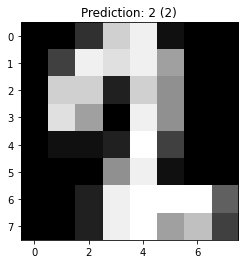

In [19]:
idx = np.random.randint(len(X_test))
img = X_test[idx].reshape(8, 8)
plt.imshow(img, cmap="gray")
plt.title("Prediction: {} ({})".format(y_pred[idx], y_test[idx]))
plt.show()

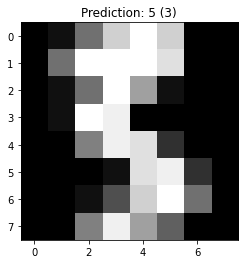

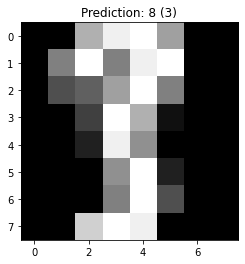

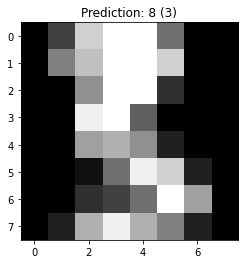

In [20]:
six_digits_idx = np.argwhere(y_test == 3).flatten()
for idx in six_digits_idx:
    if y_pred[idx] != 3:
        img = X_test[idx].reshape(8, 8)
        plt.imshow(img, cmap="gray")
        plt.title("Prediction: {} ({})".format(y_pred[idx], y_test[idx]))
        plt.show()

In [21]:
# 1st feature
weather = ["Sunny", "Sunny", "Overcast", "Rainy", "Rainy", "Rainy", "Overcast", "Sunny", "Sunny",
           "Rainy", "Sunny", "Overcast", "Overcast", "Rainy"]
# 2nd feature
temp = ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild", "Mild", "Mild", "Hot", "Mild"]

# class
play = ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"]

print(len(weather), len(temp), len(play))

14 14 14


In [22]:
encoder_weather = LabelEncoder()
encoder_temp = LabelEncoder()
encoder_play = LabelEncoder()

enc_weather = encoder_weather.fit_transform(weather)
enc_temp = encoder_temp.fit_transform(temp)
enc_play = encoder_play.fit_transform(play)

features = list(zip(enc_weather, enc_temp))
print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [23]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(features, enc_play)

sample_pred = knn.predict([[0, 1], [1, 1]])
print(sample_pred)

[1 0]


In [24]:
print(encoder_weather.classes_)
print(encoder_temp.classes_)
print(encoder_play.classes_)

['Overcast' 'Rainy' 'Sunny']
['Cool' 'Hot' 'Mild']
['No' 'Yes']


In [25]:
y_pred = knn.predict(features)
print(classification_report(enc_play, y_pred, target_names=encoder_play.classes_))

              precision    recall  f1-score   support

          No       0.60      0.60      0.60         5
         Yes       0.78      0.78      0.78         9

    accuracy                           0.71        14
   macro avg       0.69      0.69      0.69        14
weighted avg       0.71      0.71      0.71        14



In [26]:
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [27]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [28]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [29]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=.2, random_state=11)
print("train set size:", X_train.shape)
print("test set size:", X_test.shape)

train set size: (142, 13)
test set size: (36, 13)


Training performance:
              precision    recall  f1-score   support

     class_0       0.87      0.91      0.89        45
     class_1       0.77      0.71      0.74        56
     class_2       0.67      0.71      0.69        41

    accuracy                           0.77       142
   macro avg       0.77      0.78      0.77       142
weighted avg       0.77      0.77      0.77       142

Test performance:
              precision    recall  f1-score   support

     class_0       0.88      1.00      0.93        14
     class_1       0.77      0.67      0.71        15
     class_2       0.43      0.43      0.43         7

    accuracy                           0.75        36
   macro avg       0.69      0.70      0.69        36
weighted avg       0.74      0.75      0.74        36



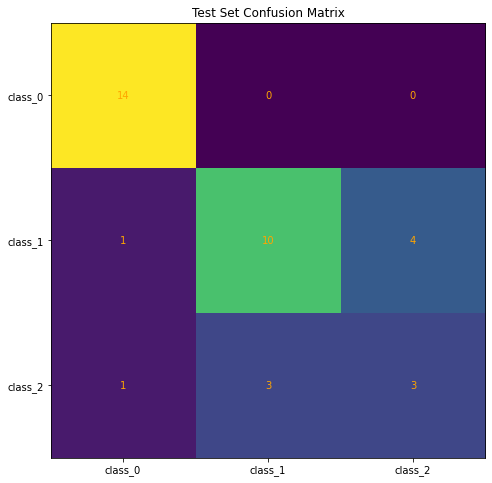

In [30]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

train_pred = knn.predict(X_train)
test_pred = knn.predict(X_test)
print("Training performance:")
print(classification_report(y_train, train_pred, target_names=wine.target_names))
print("Test performance:")
print(classification_report(y_test, test_pred, target_names=wine.target_names))

cm = confusion_matrix(y_test, test_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=wine.target_names)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=wine.target_names)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="orange")
plt.title("Test Set Confusion Matrix")
plt.show()

Training performance:
              precision    recall  f1-score   support

     class_0       0.83      0.96      0.89        45
     class_1       0.78      0.71      0.75        56
     class_2       0.72      0.68      0.70        41

    accuracy                           0.78       142
   macro avg       0.78      0.78      0.78       142
weighted avg       0.78      0.78      0.78       142

Test performance:
              precision    recall  f1-score   support

     class_0       0.93      1.00      0.97        14
     class_1       0.77      0.67      0.71        15
     class_2       0.38      0.43      0.40         7

    accuracy                           0.75        36
   macro avg       0.69      0.70      0.69        36
weighted avg       0.76      0.75      0.75        36



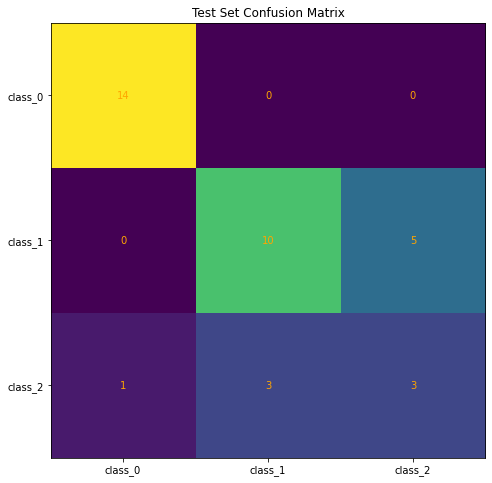

In [31]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

train_pred = knn.predict(X_train)
test_pred = knn.predict(X_test)
print("Training performance:")
print(classification_report(y_train, train_pred, target_names=wine.target_names))
print("Test performance:")
print(classification_report(y_test, test_pred, target_names=wine.target_names))

cm = confusion_matrix(y_test, test_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=wine.target_names)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=wine.target_names)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="orange")
plt.title("Test Set Confusion Matrix")
plt.show()

Training performance:
              precision    recall  f1-score   support

     class_0       0.78      0.96      0.86        45
     class_1       0.79      0.73      0.76        56
     class_2       0.71      0.61      0.66        41

    accuracy                           0.77       142
   macro avg       0.76      0.77      0.76       142
weighted avg       0.76      0.77      0.76       142

Test performance:
              precision    recall  f1-score   support

     class_0       0.93      1.00      0.97        14
     class_1       0.86      0.80      0.83        15
     class_2       0.57      0.57      0.57         7

    accuracy                           0.83        36
   macro avg       0.79      0.79      0.79        36
weighted avg       0.83      0.83      0.83        36



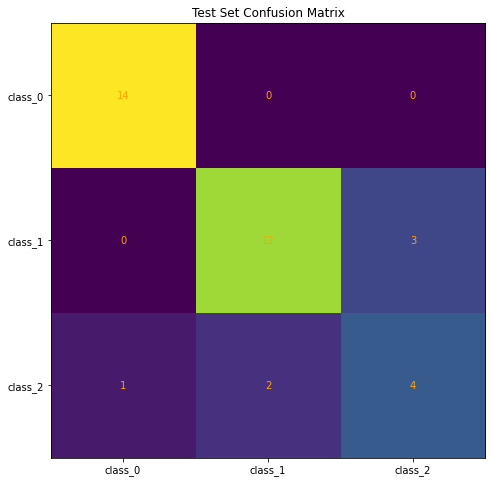

In [32]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

train_pred = knn.predict(X_train)
test_pred = knn.predict(X_test)
print("Training performance:")
print(classification_report(y_train, train_pred, target_names=wine.target_names))
print("Test performance:")
print(classification_report(y_test, test_pred, target_names=wine.target_names))

cm = confusion_matrix(y_test, test_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=wine.target_names)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=wine.target_names)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="orange")
plt.title("Test Set Confusion Matrix")
plt.show()

In [33]:
errors = []
accuracies = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    accuracy = np.mean(pred == y_test)
    error = np.mean(pred != y_test)
    accuracies.append(accuracy)
    errors.append(error)

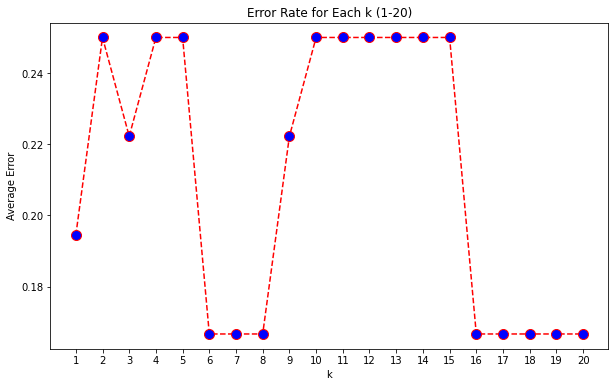

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), errors, color="red", linestyle="dashed", marker="o", markerfacecolor="blue", markersize=10)
plt.title("Error Rate for Each k (1-20)")
plt.xlabel("k")
plt.xticks(range(1, 21))
plt.ylabel("Average Error")
plt.show()

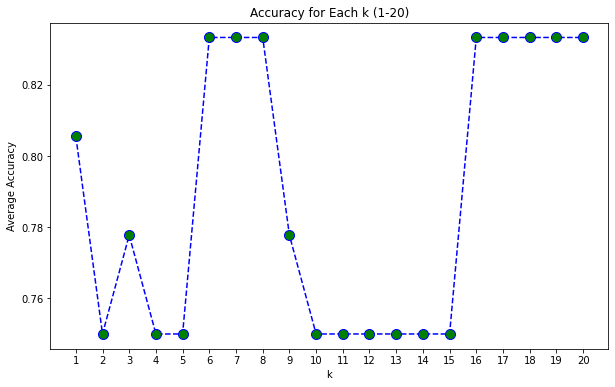

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracies, color="blue", linestyle="dashed", marker="o", markerfacecolor="green", markersize=10)
plt.title("Accuracy for Each k (1-20)")
plt.xlabel("k")
plt.xticks(range(1, 21))
plt.ylabel("Average Accuracy")
plt.show()